In [27]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

plt.set_cmap('gray')


objpoints = []
imgpoints = []

for impath in glob.glob('camera_cal/*'):
    imdata_bgr = cv2.imread(impath)
    imdata_gray = cv2.cvtColor(imdata_bgr, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(imdata_gray, (9, 6))
    if not ret:
        print('Warning: Could not extract corners from chessboard'
              f'image {impath}')
        continue

    imgpoints.append(corners)

    objp = np.zeros((9 * 6, 3), np.float32)
    objp[:,:2] = np.mgrid[:9, :6].T.reshape(-1, 2)
    objpoints.append(objp)


# all images are the same size, so use the shape of the last one
imshape = imdata_gray.shape[::-1]
ret, camera_mtx, camera_dist, _, _ = cv2.calibrateCamera(
    objpoints, imgpoints, imshape, None, None)
    
if not ret:
    raise Exception('Could not calibrate camera!')

Text(0.5,1,'Undistorted')

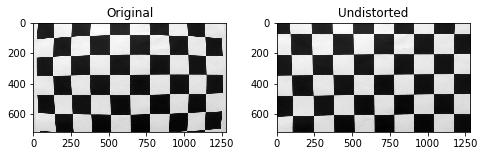

In [58]:
%matplotlib inline

imdata_bgr = cv2.imread('camera_cal/calibration1.jpg')
imdata_gray = cv2.cvtColor(imdata_bgr, cv2.COLOR_BGR2GRAY)
undistorted = cv2.undistort(
    imdata_gray, camera_mtx, camera_dist, None, camera_mtx)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
ax1.imshow(imdata_gray)
ax1.set_title('Original')
ax2.imshow(undistorted)
ax2.set_title('Undistorted')